In [1]:
import pandas as pd
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
print(df.describe(include="all"))

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

Matplotlib is building the font cache; this may take a moment.


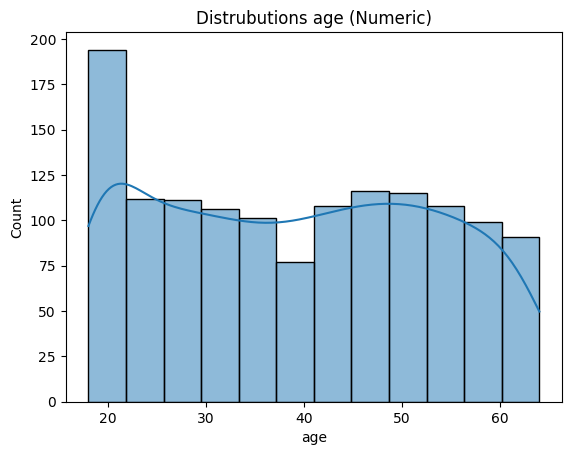

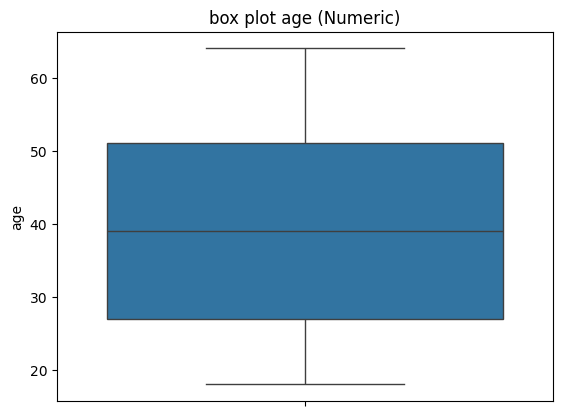

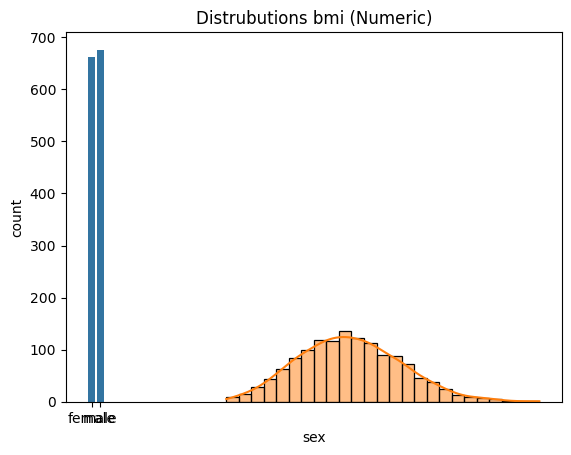

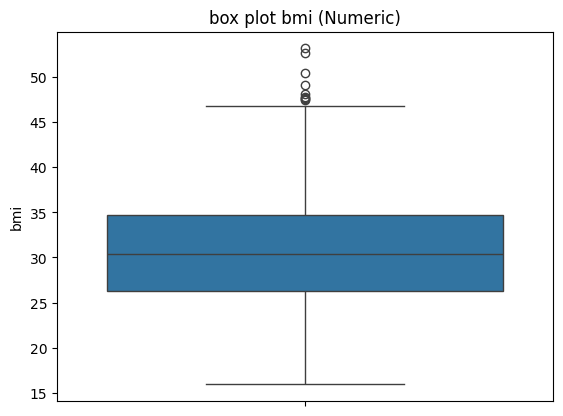

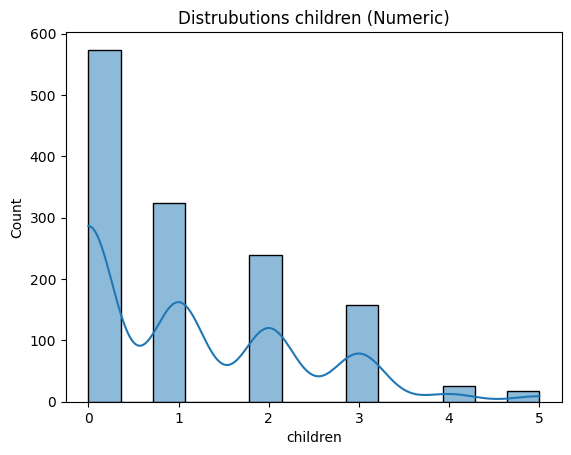

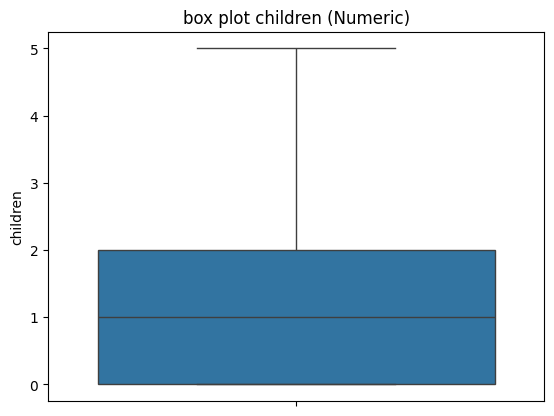

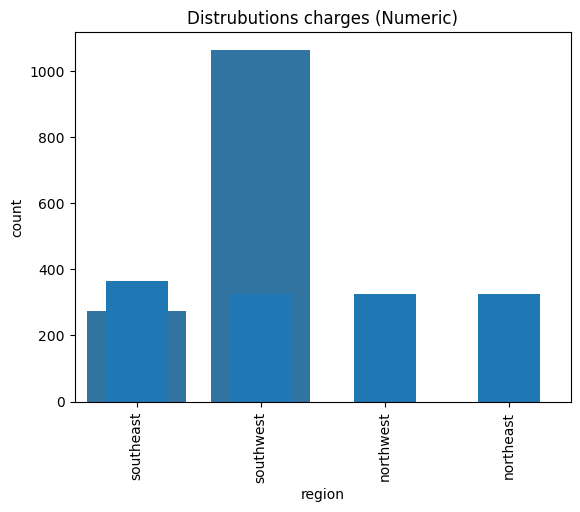

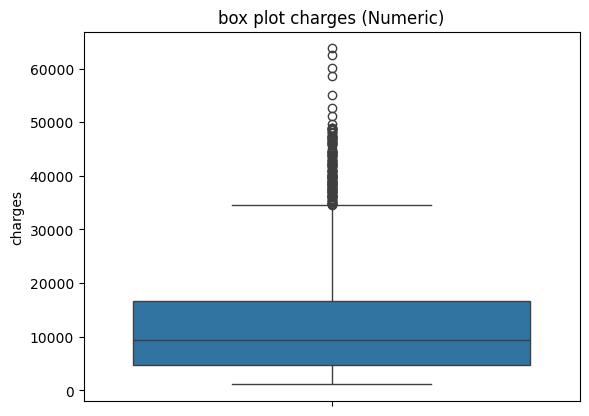

In [3]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
def create_visualization(col,df):
    if df[col].dtypes=='object':
        if df[col].nunique()==2:
            sns.countplot(x=col,data=df)
            plt.title(f"Distrubutions of {col} (binary)")
        else:
            df[col].value_counts().plot(kind="bar")
            plt.title(f"bar plot {col} (Nominal)")
    elif df[col].dtype in ['int64','float64']:
        sns.histplot(df[col],kde=True)
        plt.title(f"Distrubutions {col} (Numeric)")
        plt.show()

        sns.boxplot(df[col])
        plt.title(f"box plot {col} (Numeric)")
        plt.show()
for col in df.columns:
    create_visualization(col,df)
        
            

In [5]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
num_col=df.select_dtypes(include='number').columns
Q1=df[num_col].quantile(0.25)
Q3=df[num_col].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
outliers=((df[num_col]<lower)|(df[num_col]>upper))
if outliers.any().any():
    print("outliers found and removed")
else:
    print("outliers detected")


outliers found and removed


standardized data:


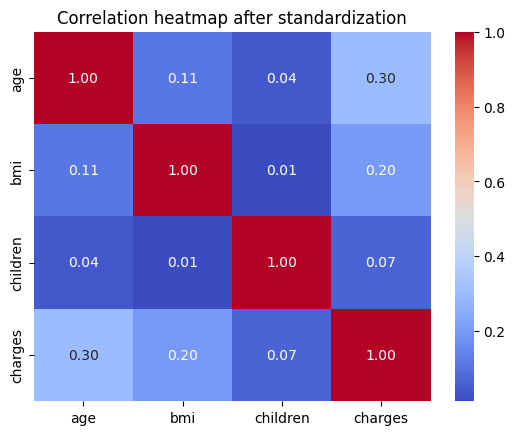

In [8]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

scaler=StandardScaler()
numerical_col=df.select_dtypes(include='number').columns
df_scaled_array=scaler.fit_transform(df[numerical_col])
print("standardized data:")
df_scaled=pd.DataFrame(df_scaled_array,columns=numerical_col)
sns.heatmap(df_scaled.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation heatmap after standardization")
plt.show()

In [26]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
corr_matrix=df_scaled.corr()
target_corr=corr_matrix["charges"]
selected_features=target_corr[abs(target_corr)>0.2].drop("charges").index.tolist()
print(selected_features)

['age']


Model 1 (age, bmi):
MSE: 131440262.76073731
R^2: 0.15335692924677946


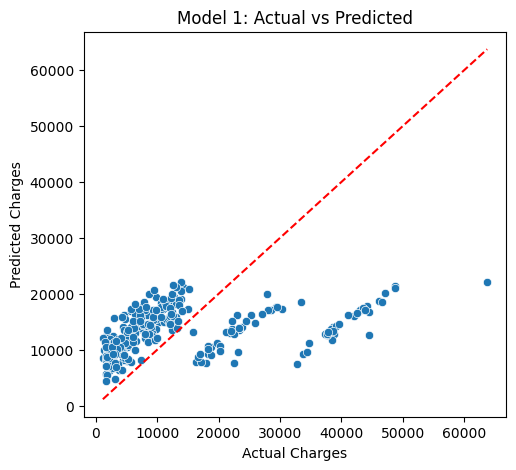


Model 2 (age, bmi, children):
MSE: 135502861.09081393
R^2: 0.12718861024642814


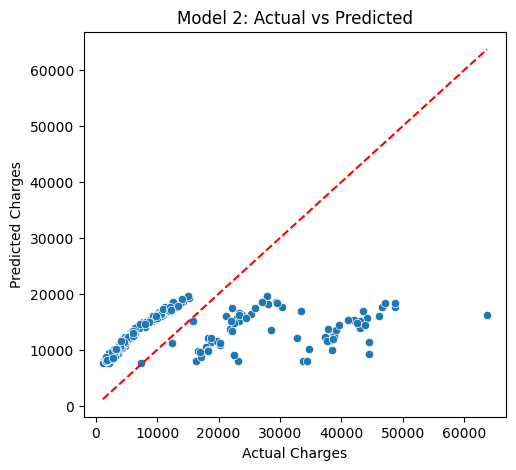

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Features and target
x1 = df[['age', 'bmi']]
x2 = df[['age',  'children']]
y = df['charges']

# Optional: Scale features (uncomment if needed)
# scaler = StandardScaler()
# x1 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)
# x2 = pd.DataFrame(scaler.fit_transform(x2), columns=x2.columns)

# Split for model1
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

# Model 1: age, bmi
model1 = LinearRegression()
model1.fit(x1_train, y_train)
y1_pred = model1.predict(x1_test)
mse1 = mean_squared_error(y_test, y1_pred)
r2_1 = r2_score(y_test, y1_pred)

print("Model 1 (age, bmi):")
print("MSE:", mse1)
print("R^2:", r2_1)

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y1_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Model 1: Actual vs Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

# Split for model2 using x2
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

# Model 2: age, bmi, children
model2 = LinearRegression()
model2.fit(x2_train, y_train)
y2_pred = model2.predict(x2_test)
mse2 = mean_squared_error(y_test, y2_pred)
r2_2 = r2_score(y_test, y2_pred)

print("\nModel 2 (age, bmi, children):")
print("MSE:", mse2)
print("R^2:", r2_2)

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y2_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Model 2: Actual vs Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()


Model1:
 MSE: 131300060.96244346
R^2: 0.15426000779013815
Model2:
 MSE: 136964382.82748264
R^2: 0.11777454468450654


Text(0.5, 1.0, 'Model2:Actual vs  predict')

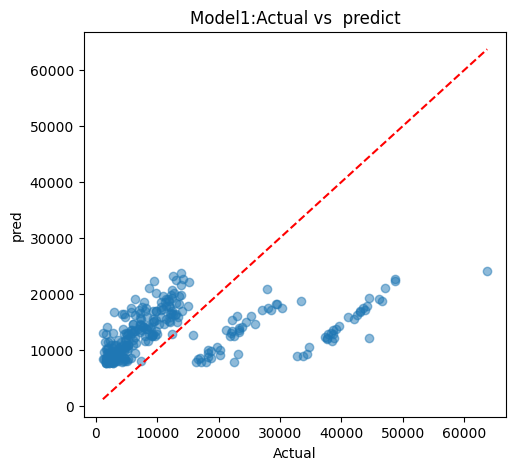

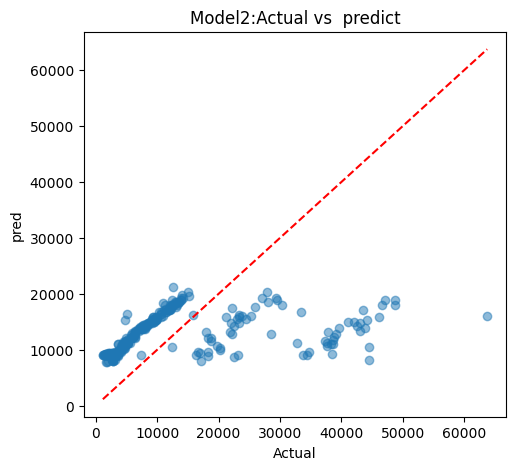

In [39]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

x1 = df[['age', 'bmi']]
x2 = df[['age', 'children']]
y = df['charges']
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)
scaler1 = StandardScaler()
x1_train_scaled = scaler1.fit_transform(x1_train)
x1_test_scaled = scaler1.transform(x1_test)


model1=MLPRegressor(hidden_layer_sizes=(100,50),
                   activation='relu',
                   solver='adam',
                   alpha=0.001,
                   batch_size=32,
                   learning_rate_init=0.001,
                   max_iter=200,
                   early_stopping=True,
                   validation_fraction=0.1,
                   random_state=42)
model1.fit(x1_train_scaled,y_train)
y1_ped=model1.predict(x1_test_scaled)
mse1=mean_squared_error(y_test,y1_ped)
r2_1=r2_score(y_test,y1_ped)
print("Model1:")
print(" MSE:",mse1)
print("R^2:",r2_1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_test,y1_ped,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--")
plt.xlabel("Actual")
plt.ylabel("pred")
plt.title("Model1:Actual vs  predict")

x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)
scaler2 = StandardScaler()
x2_train_scaled = scaler2.fit_transform(x2_train)
x2_test_scaled = scaler2.transform(x2_test)

model2=MLPRegressor(hidden_layer_sizes=(112,30),
                   activation='relu',
                   solver='adam',
                   alpha=0.001,
                   batch_size=32,
                   learning_rate_init=0.001,
                   max_iter=200,
                   early_stopping=True,
                   validation_fraction=0.1,
                   random_state=42)
model2.fit(x2_train_scaled,y_train)
y2_ped=model2.predict(x2_test_scaled)
mse2=mean_squared_error(y_test,y2_ped)
r2_2=r2_score(y_test,y2_ped)

print("Model2:")
print(" MSE:",mse2)
print("R^2:",r2_2)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_test,y2_ped,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--")
plt.xlabel("Actual")
plt.ylabel("pred")
plt.title("Model2:Actual vs  predict")

